<a href="https://colab.research.google.com/github/comeall11/Seqana_Challenge_Kamal/blob/main/GIS_Solution_Engineering_Challenge_Kamal_Shhai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GIS Solutions Engineering Challenge**
Kamal Shahi

---



# **1. Map Visualisation**




1.1   Digital Elevation Model(DEM)
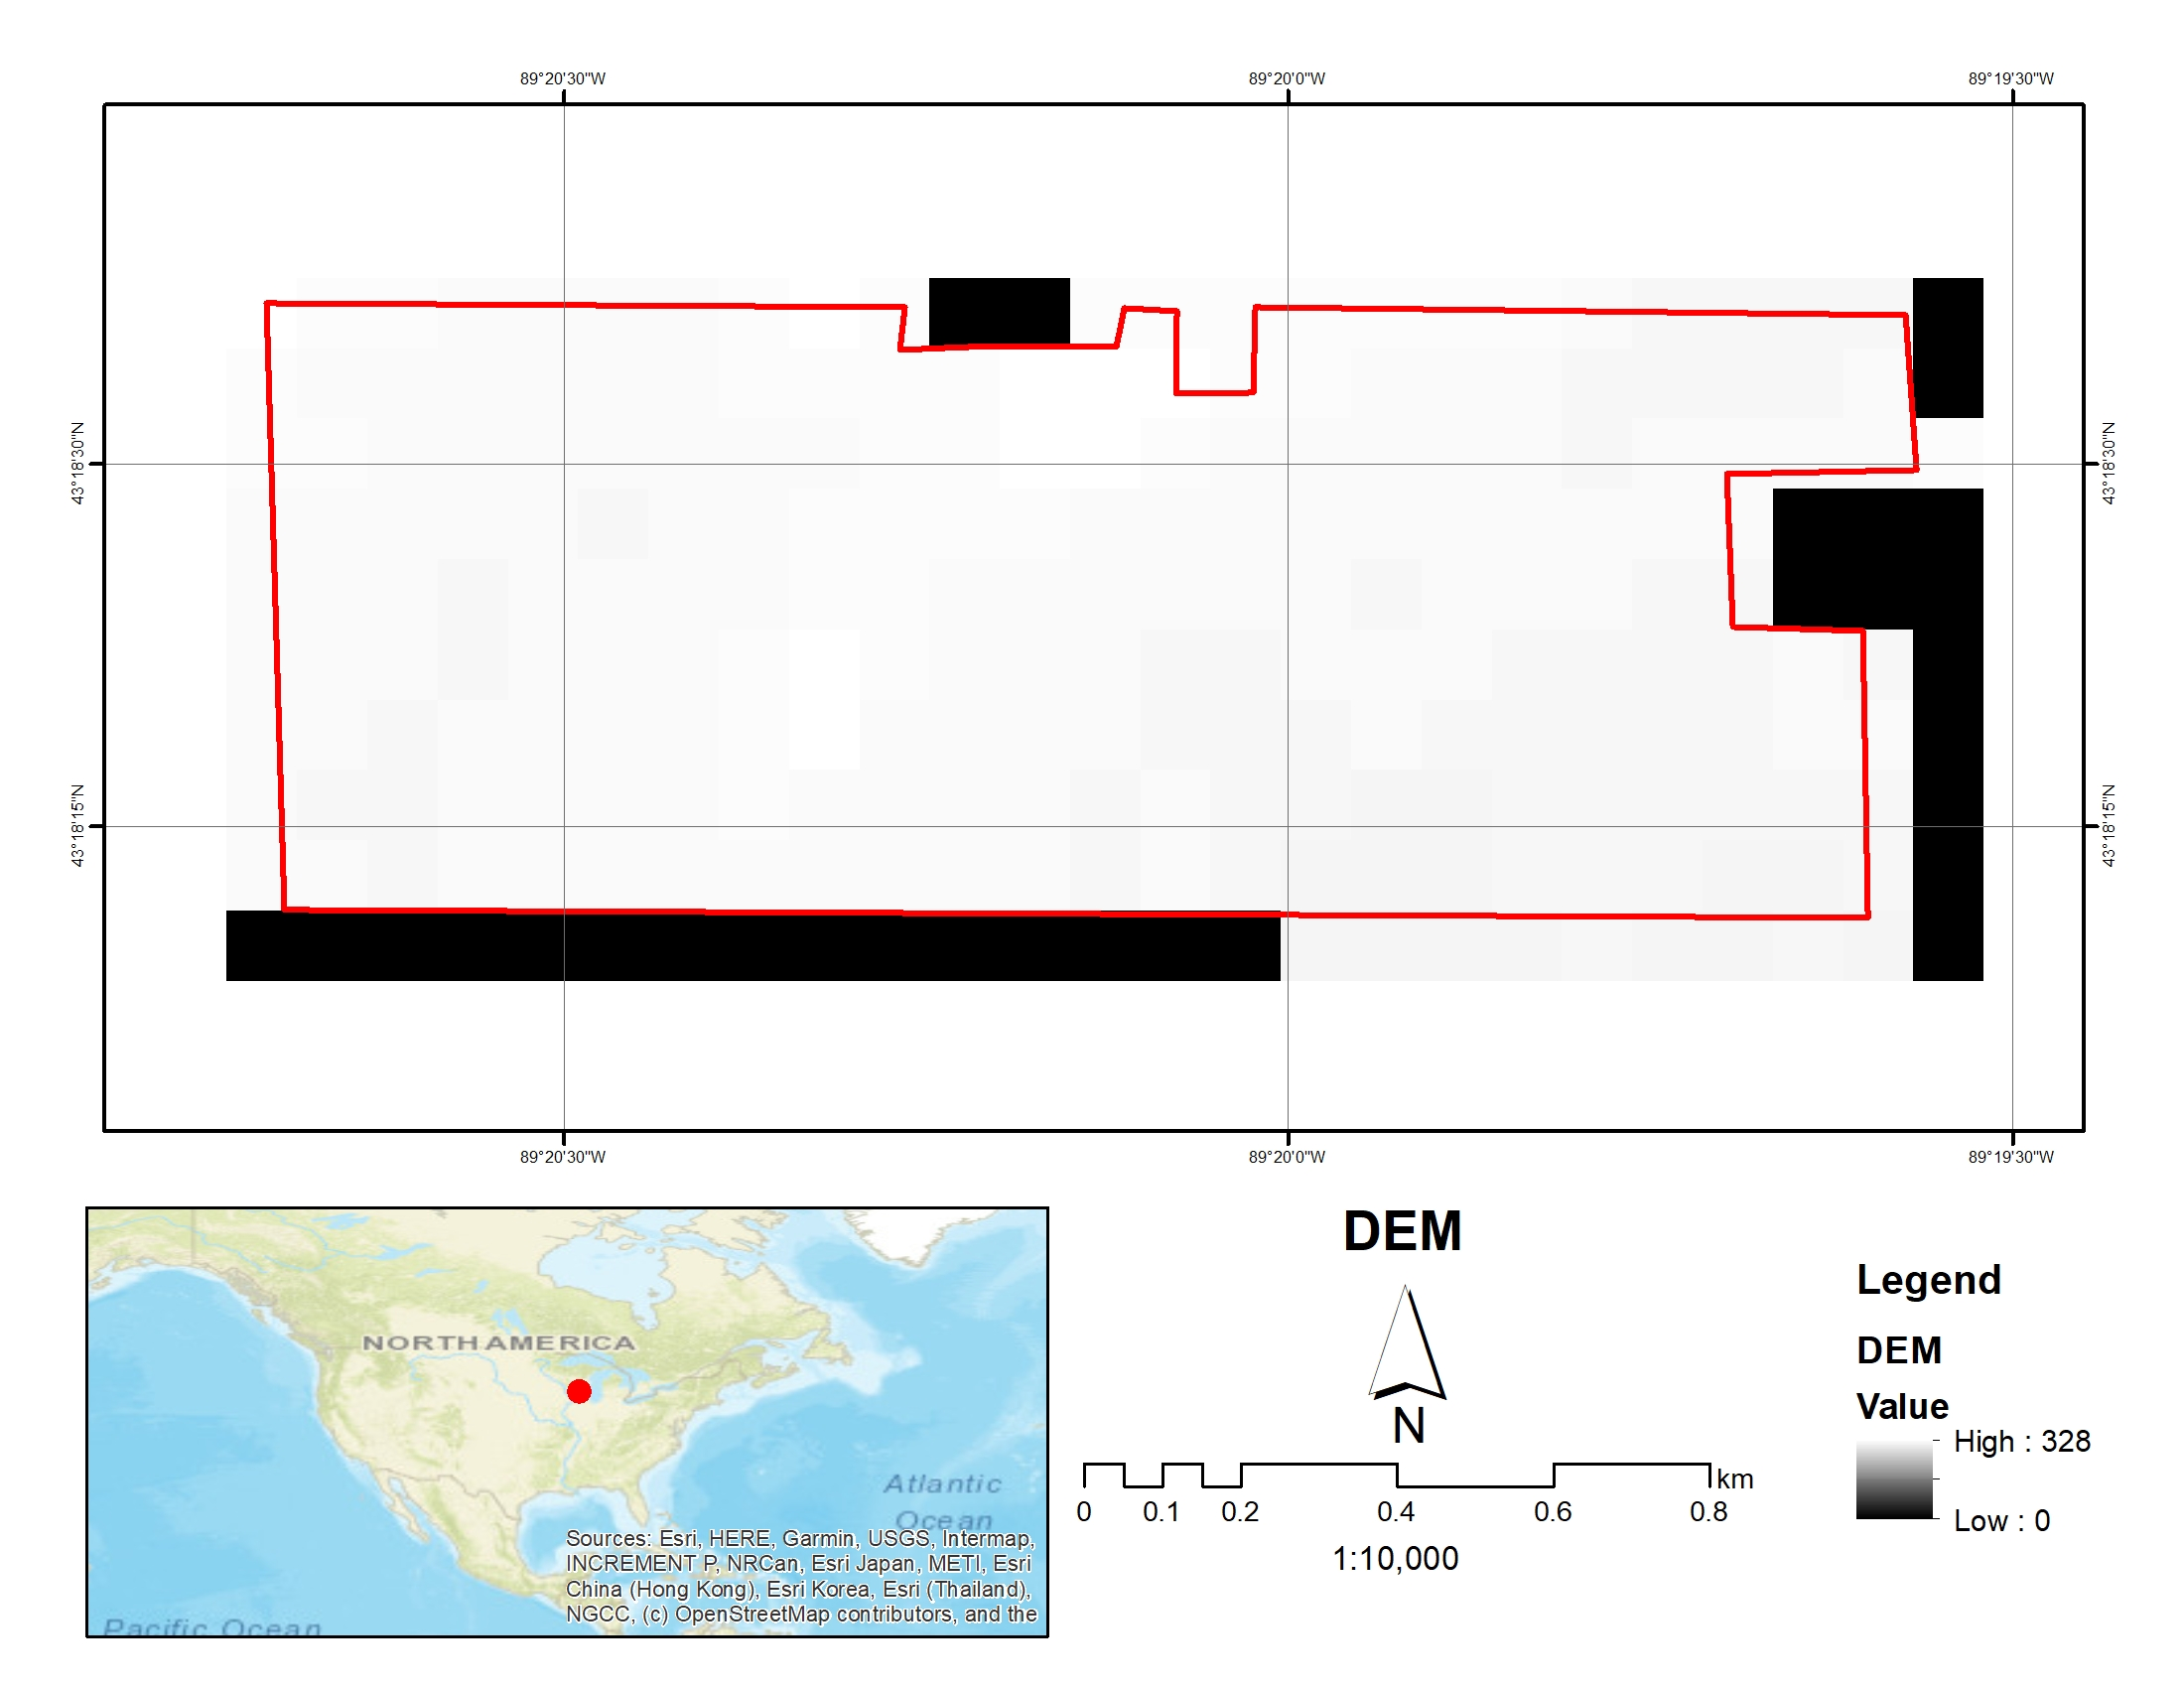


---



1.2 Annual NDVI Map
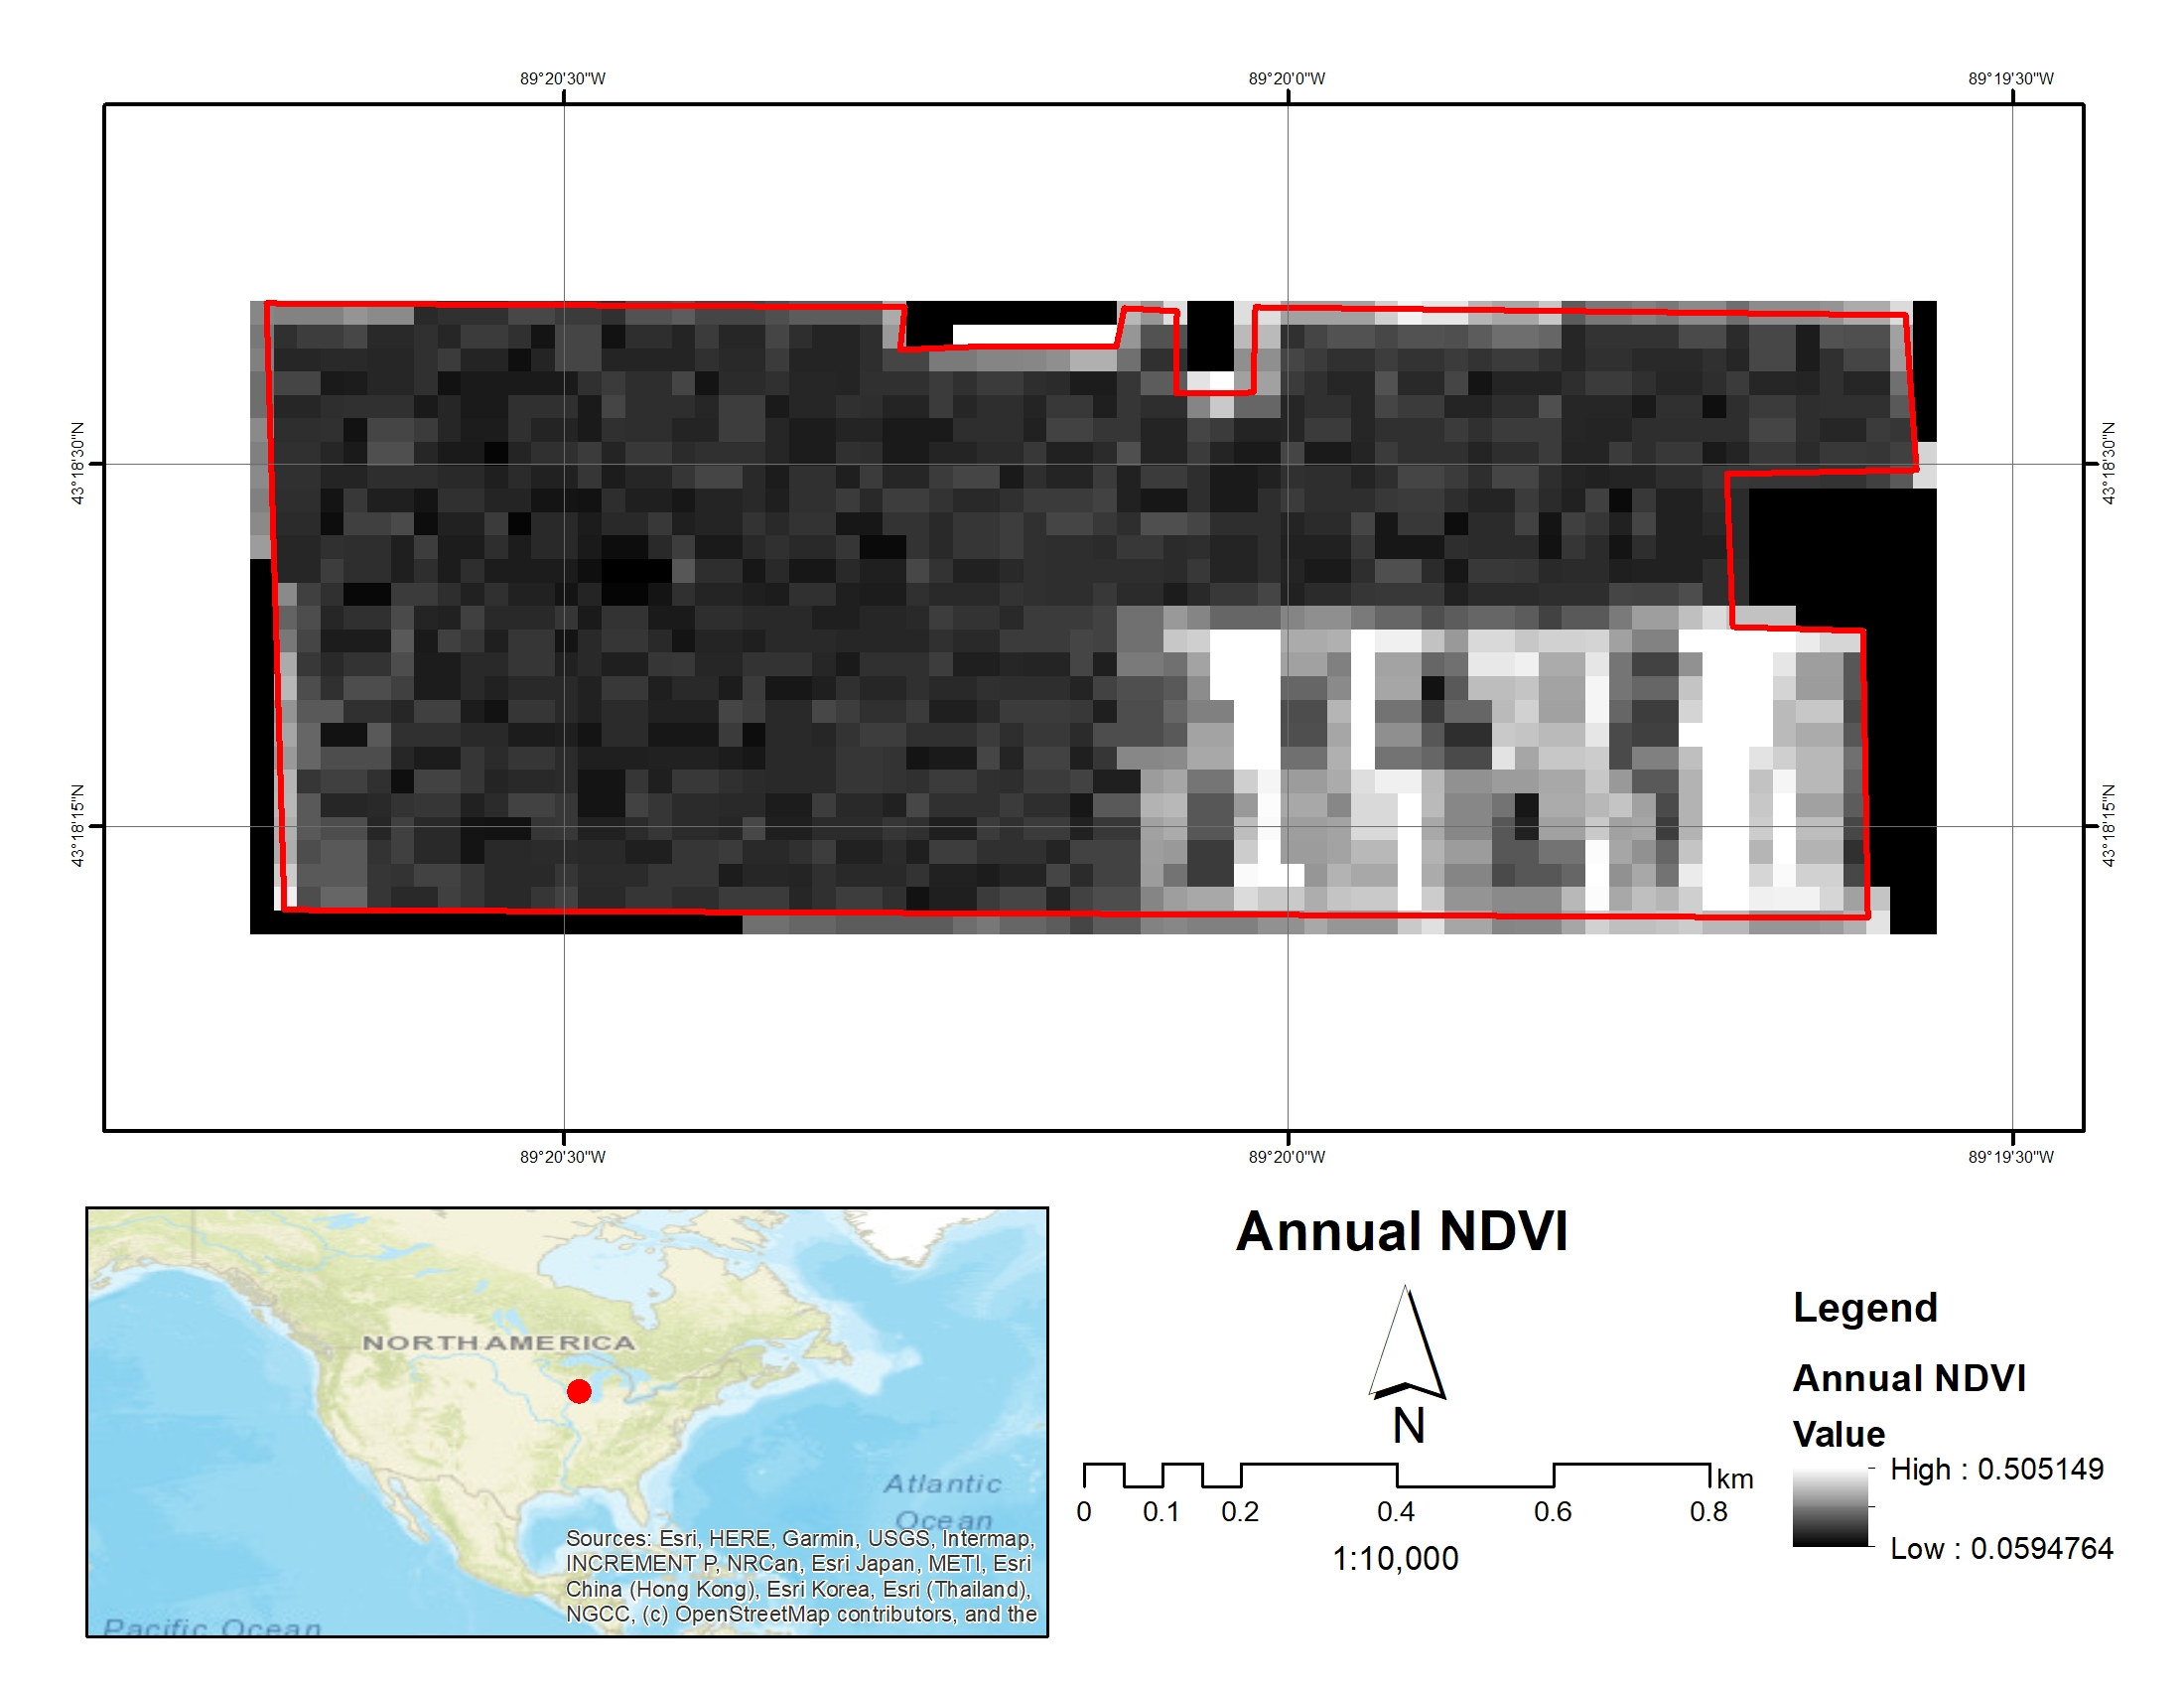


---



1.3 Annual NPP Map
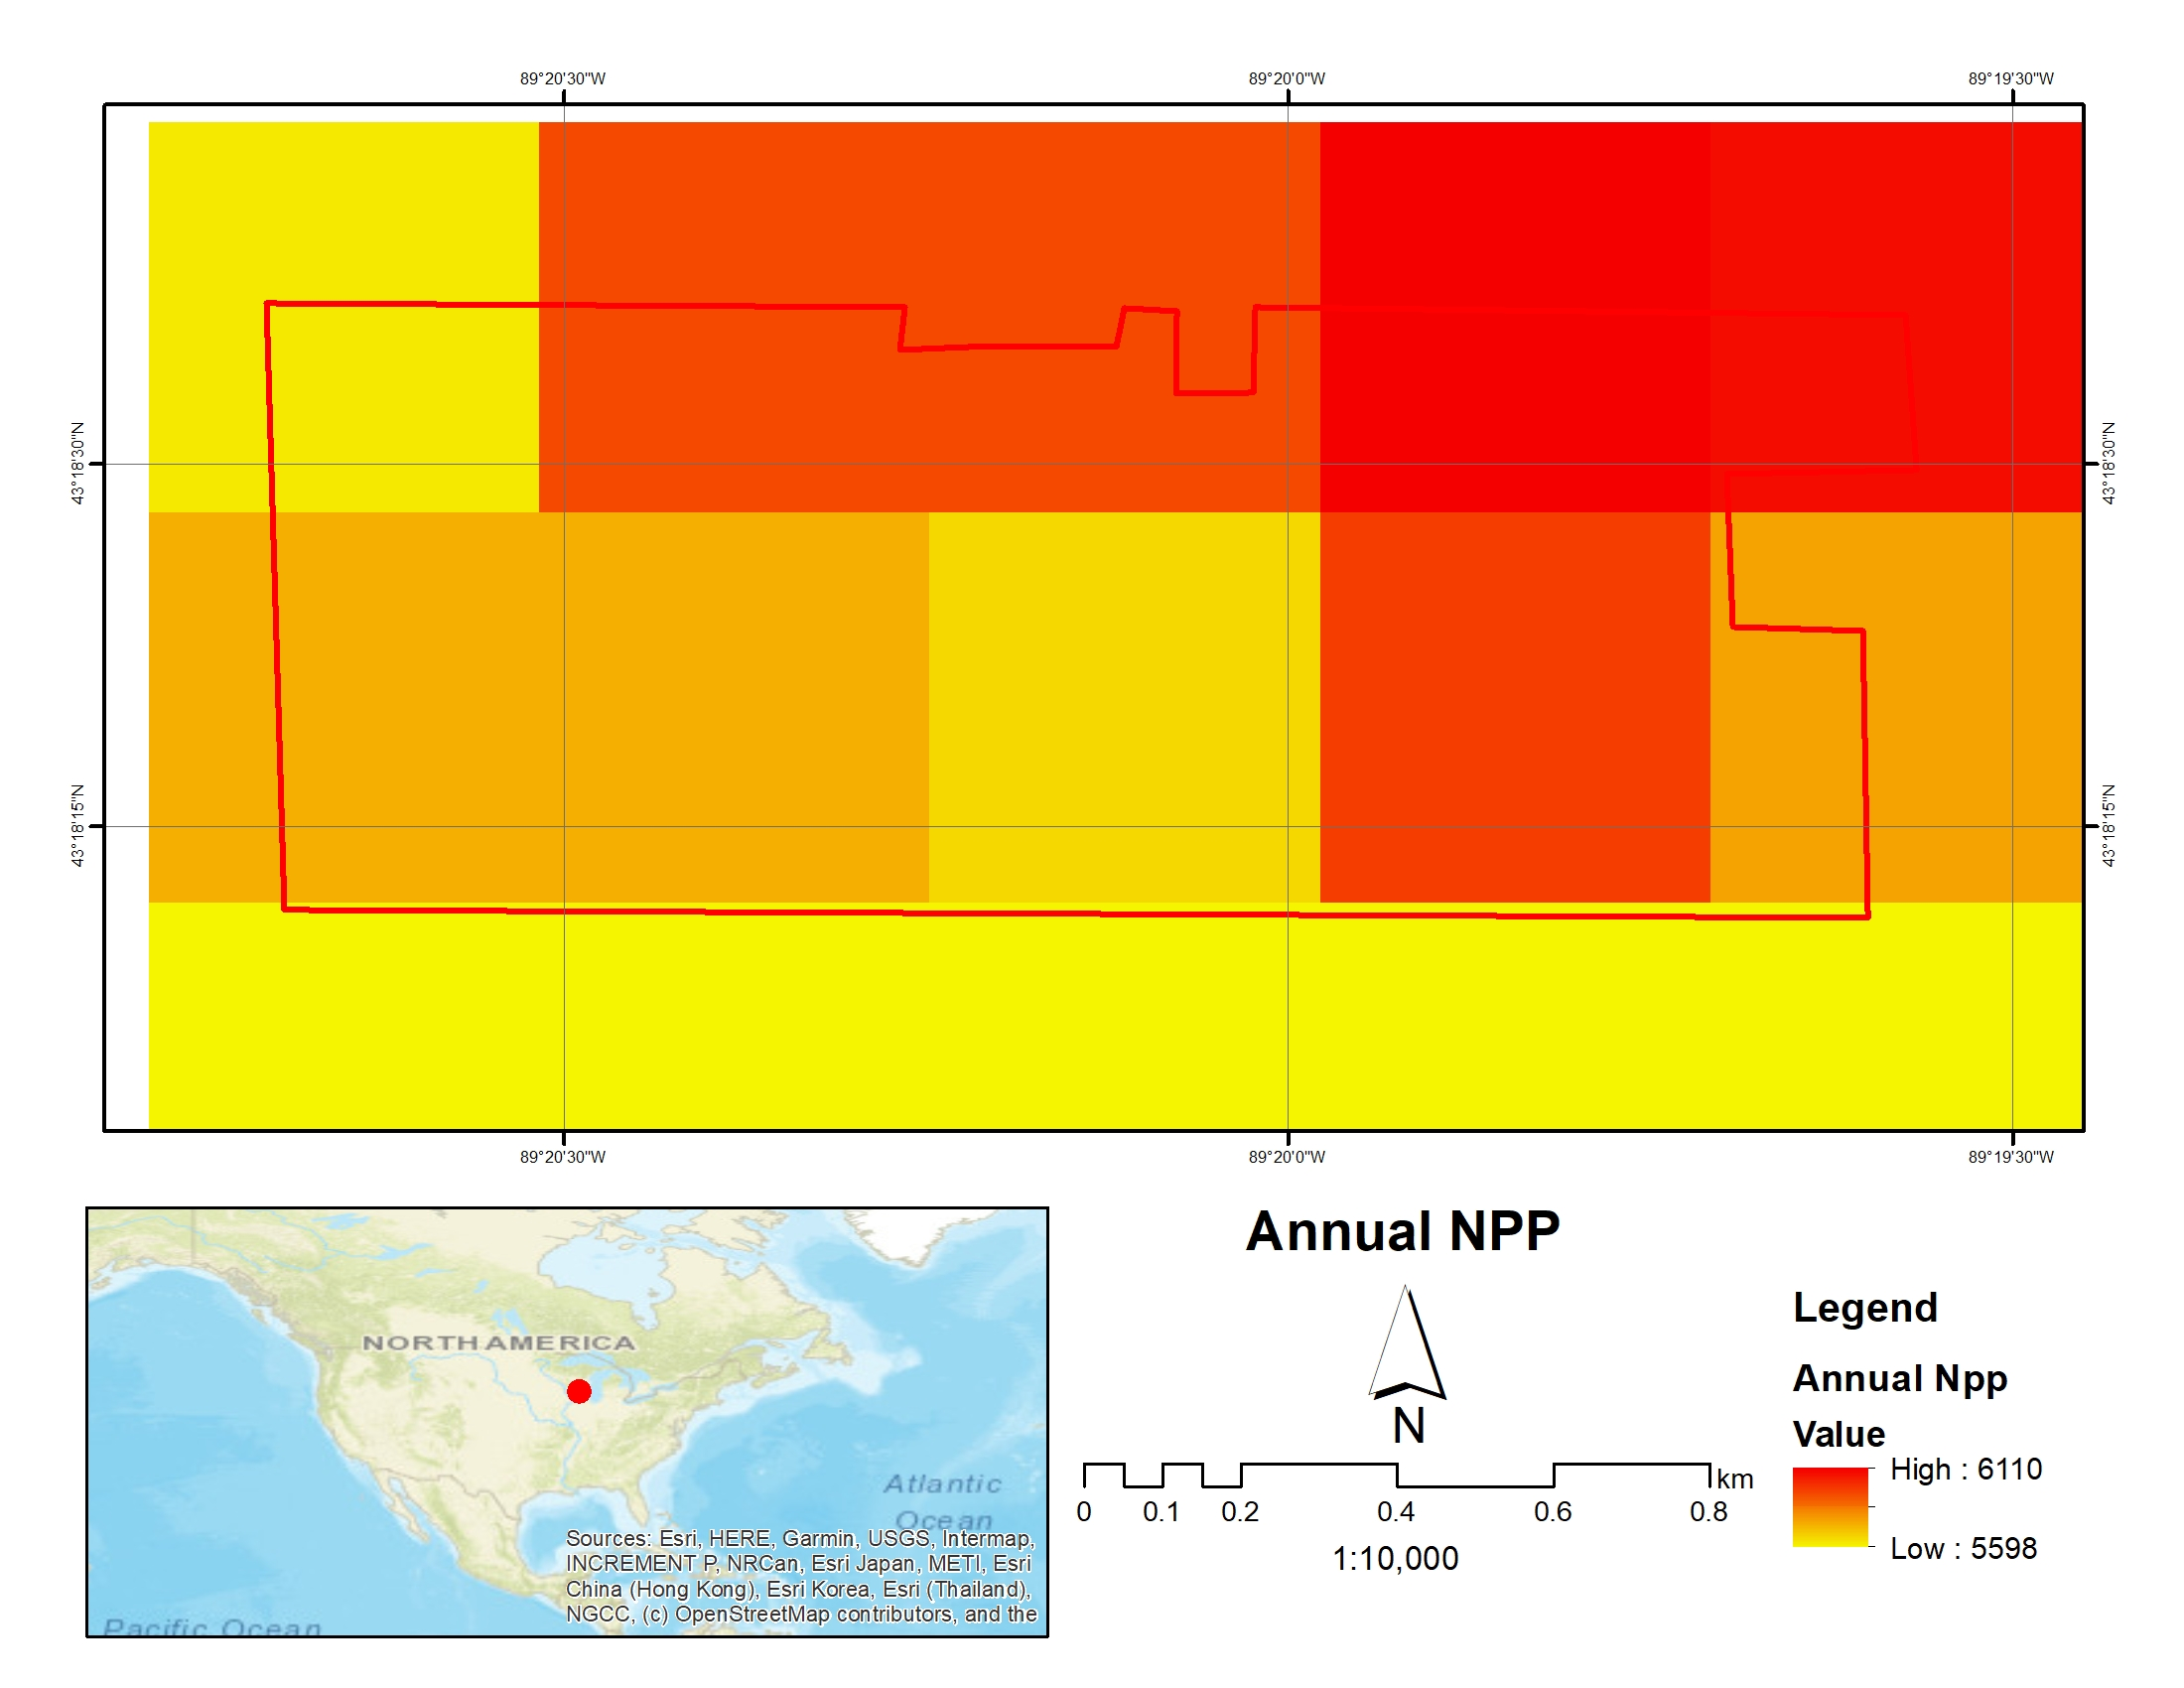


---



1.4 Open Land Map Soil Clay
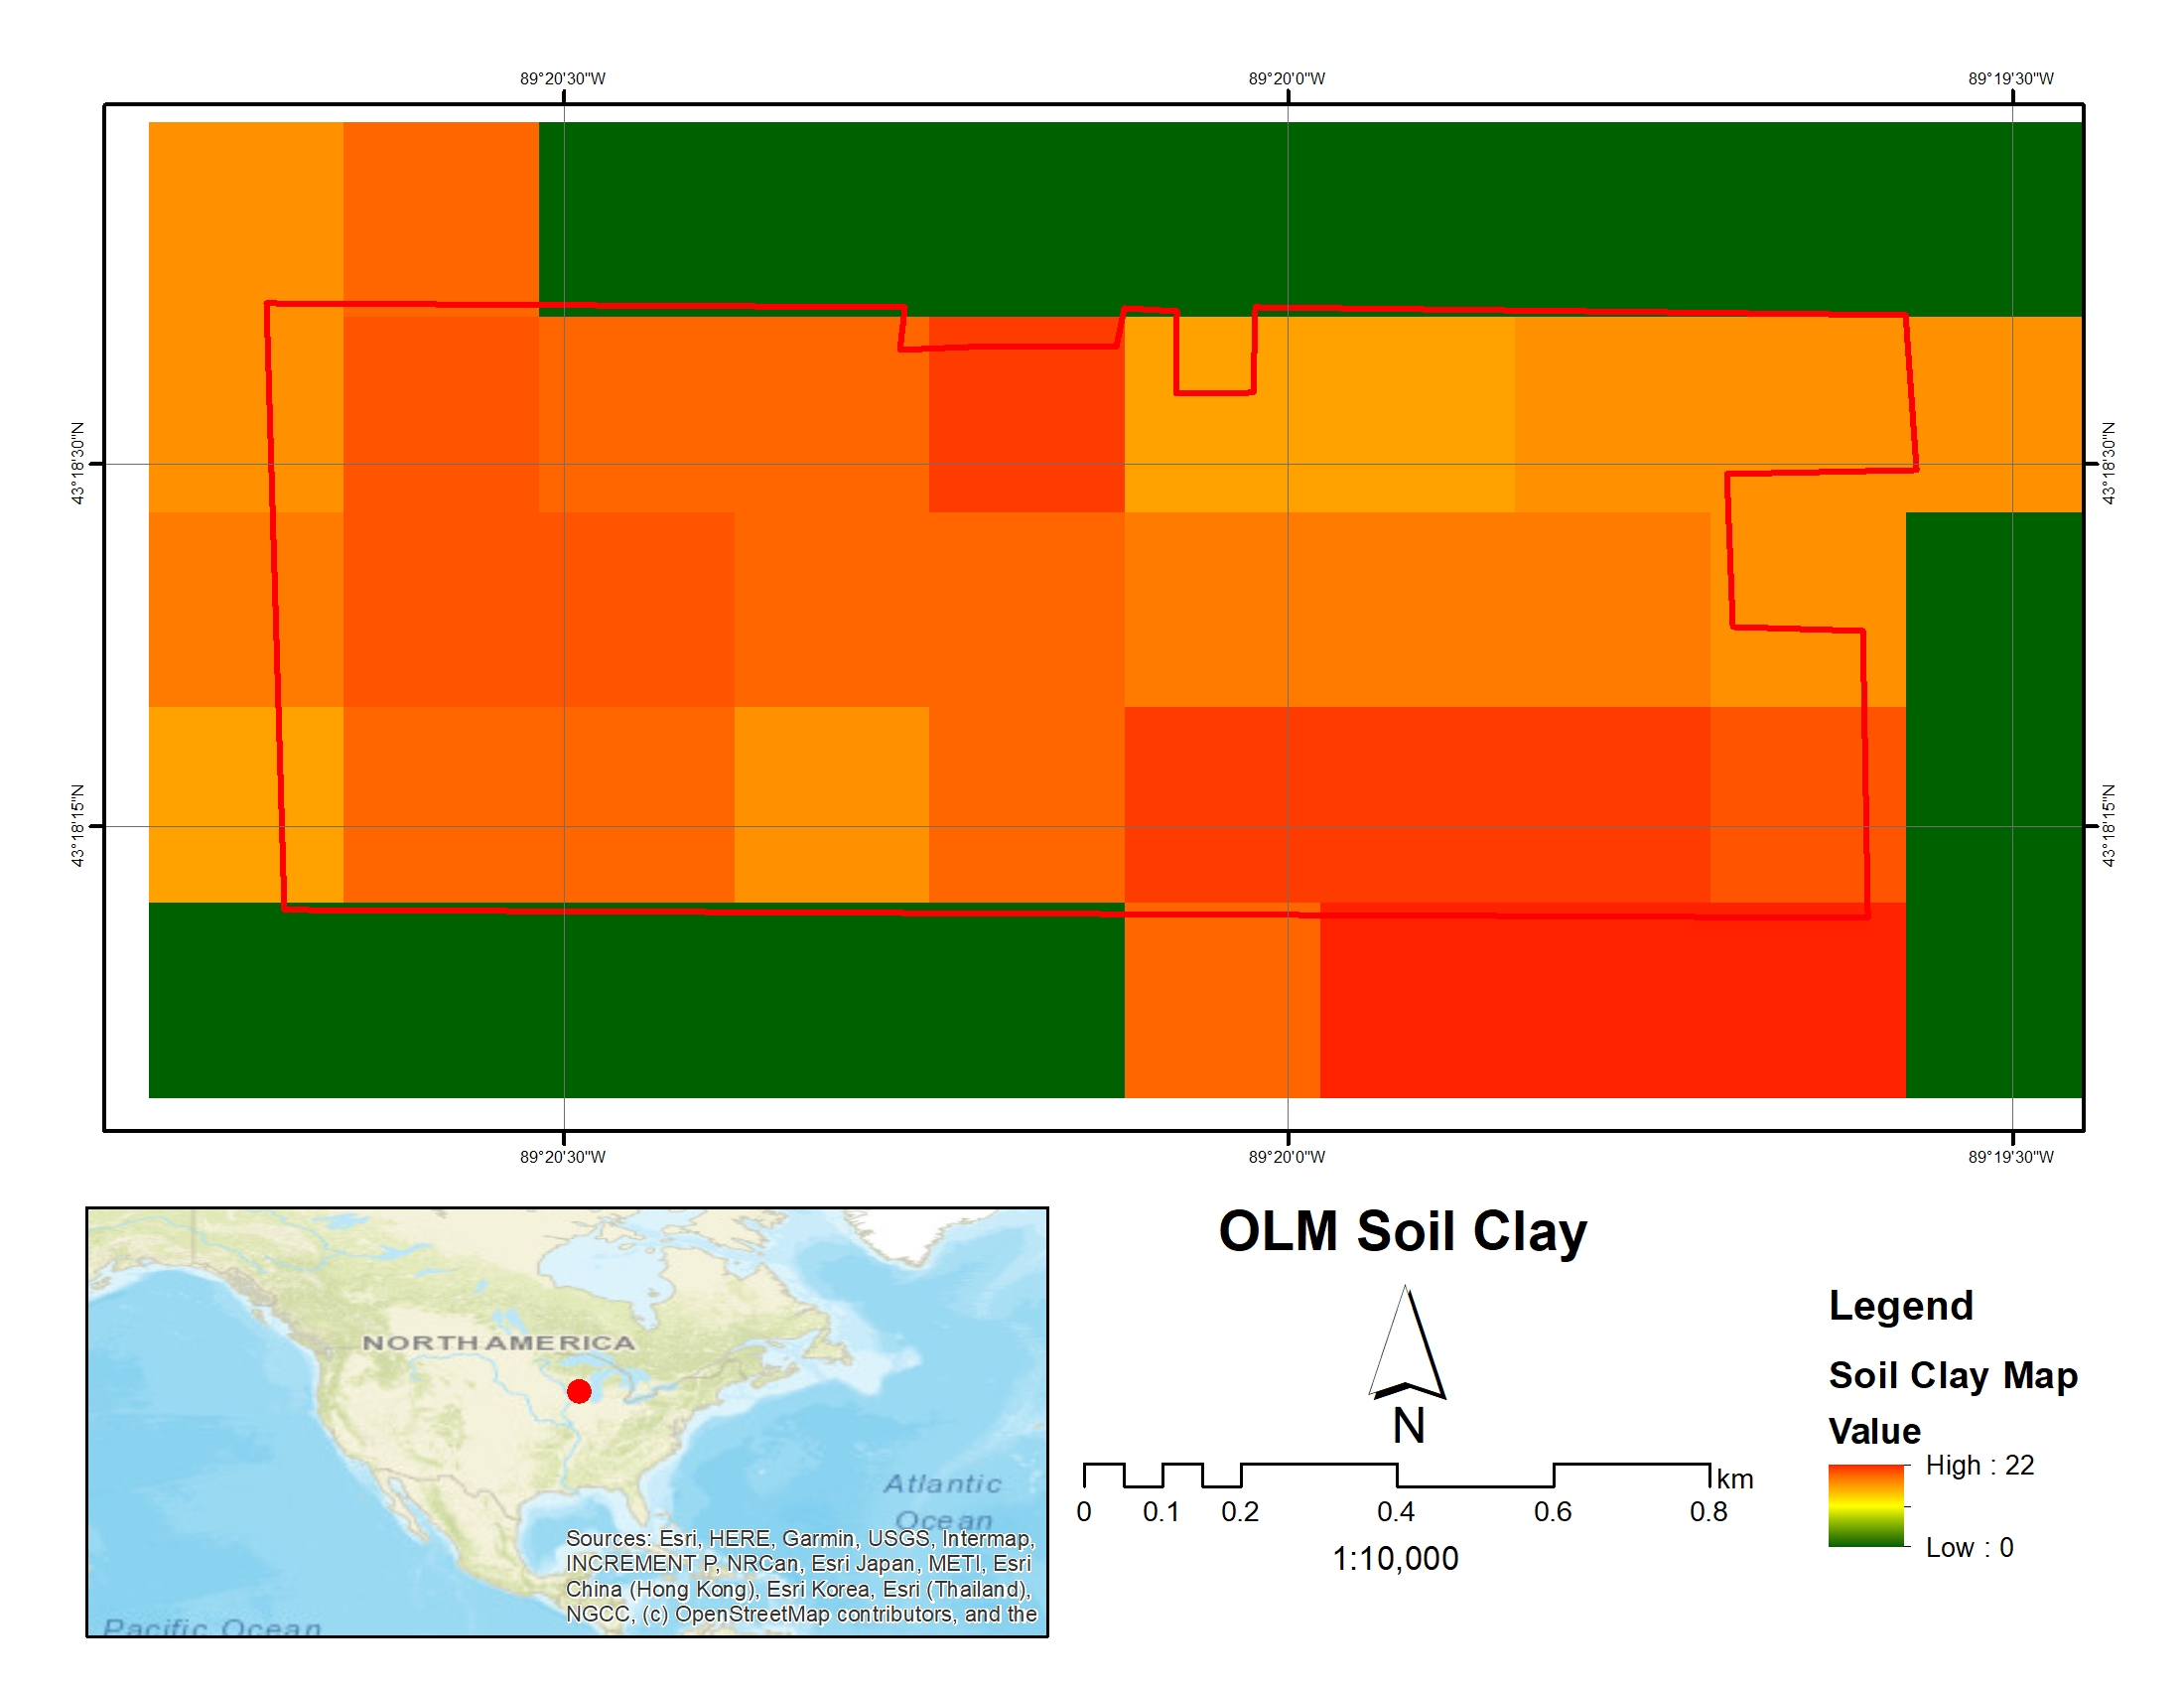


---



1.5 Open Land Map soil Ph
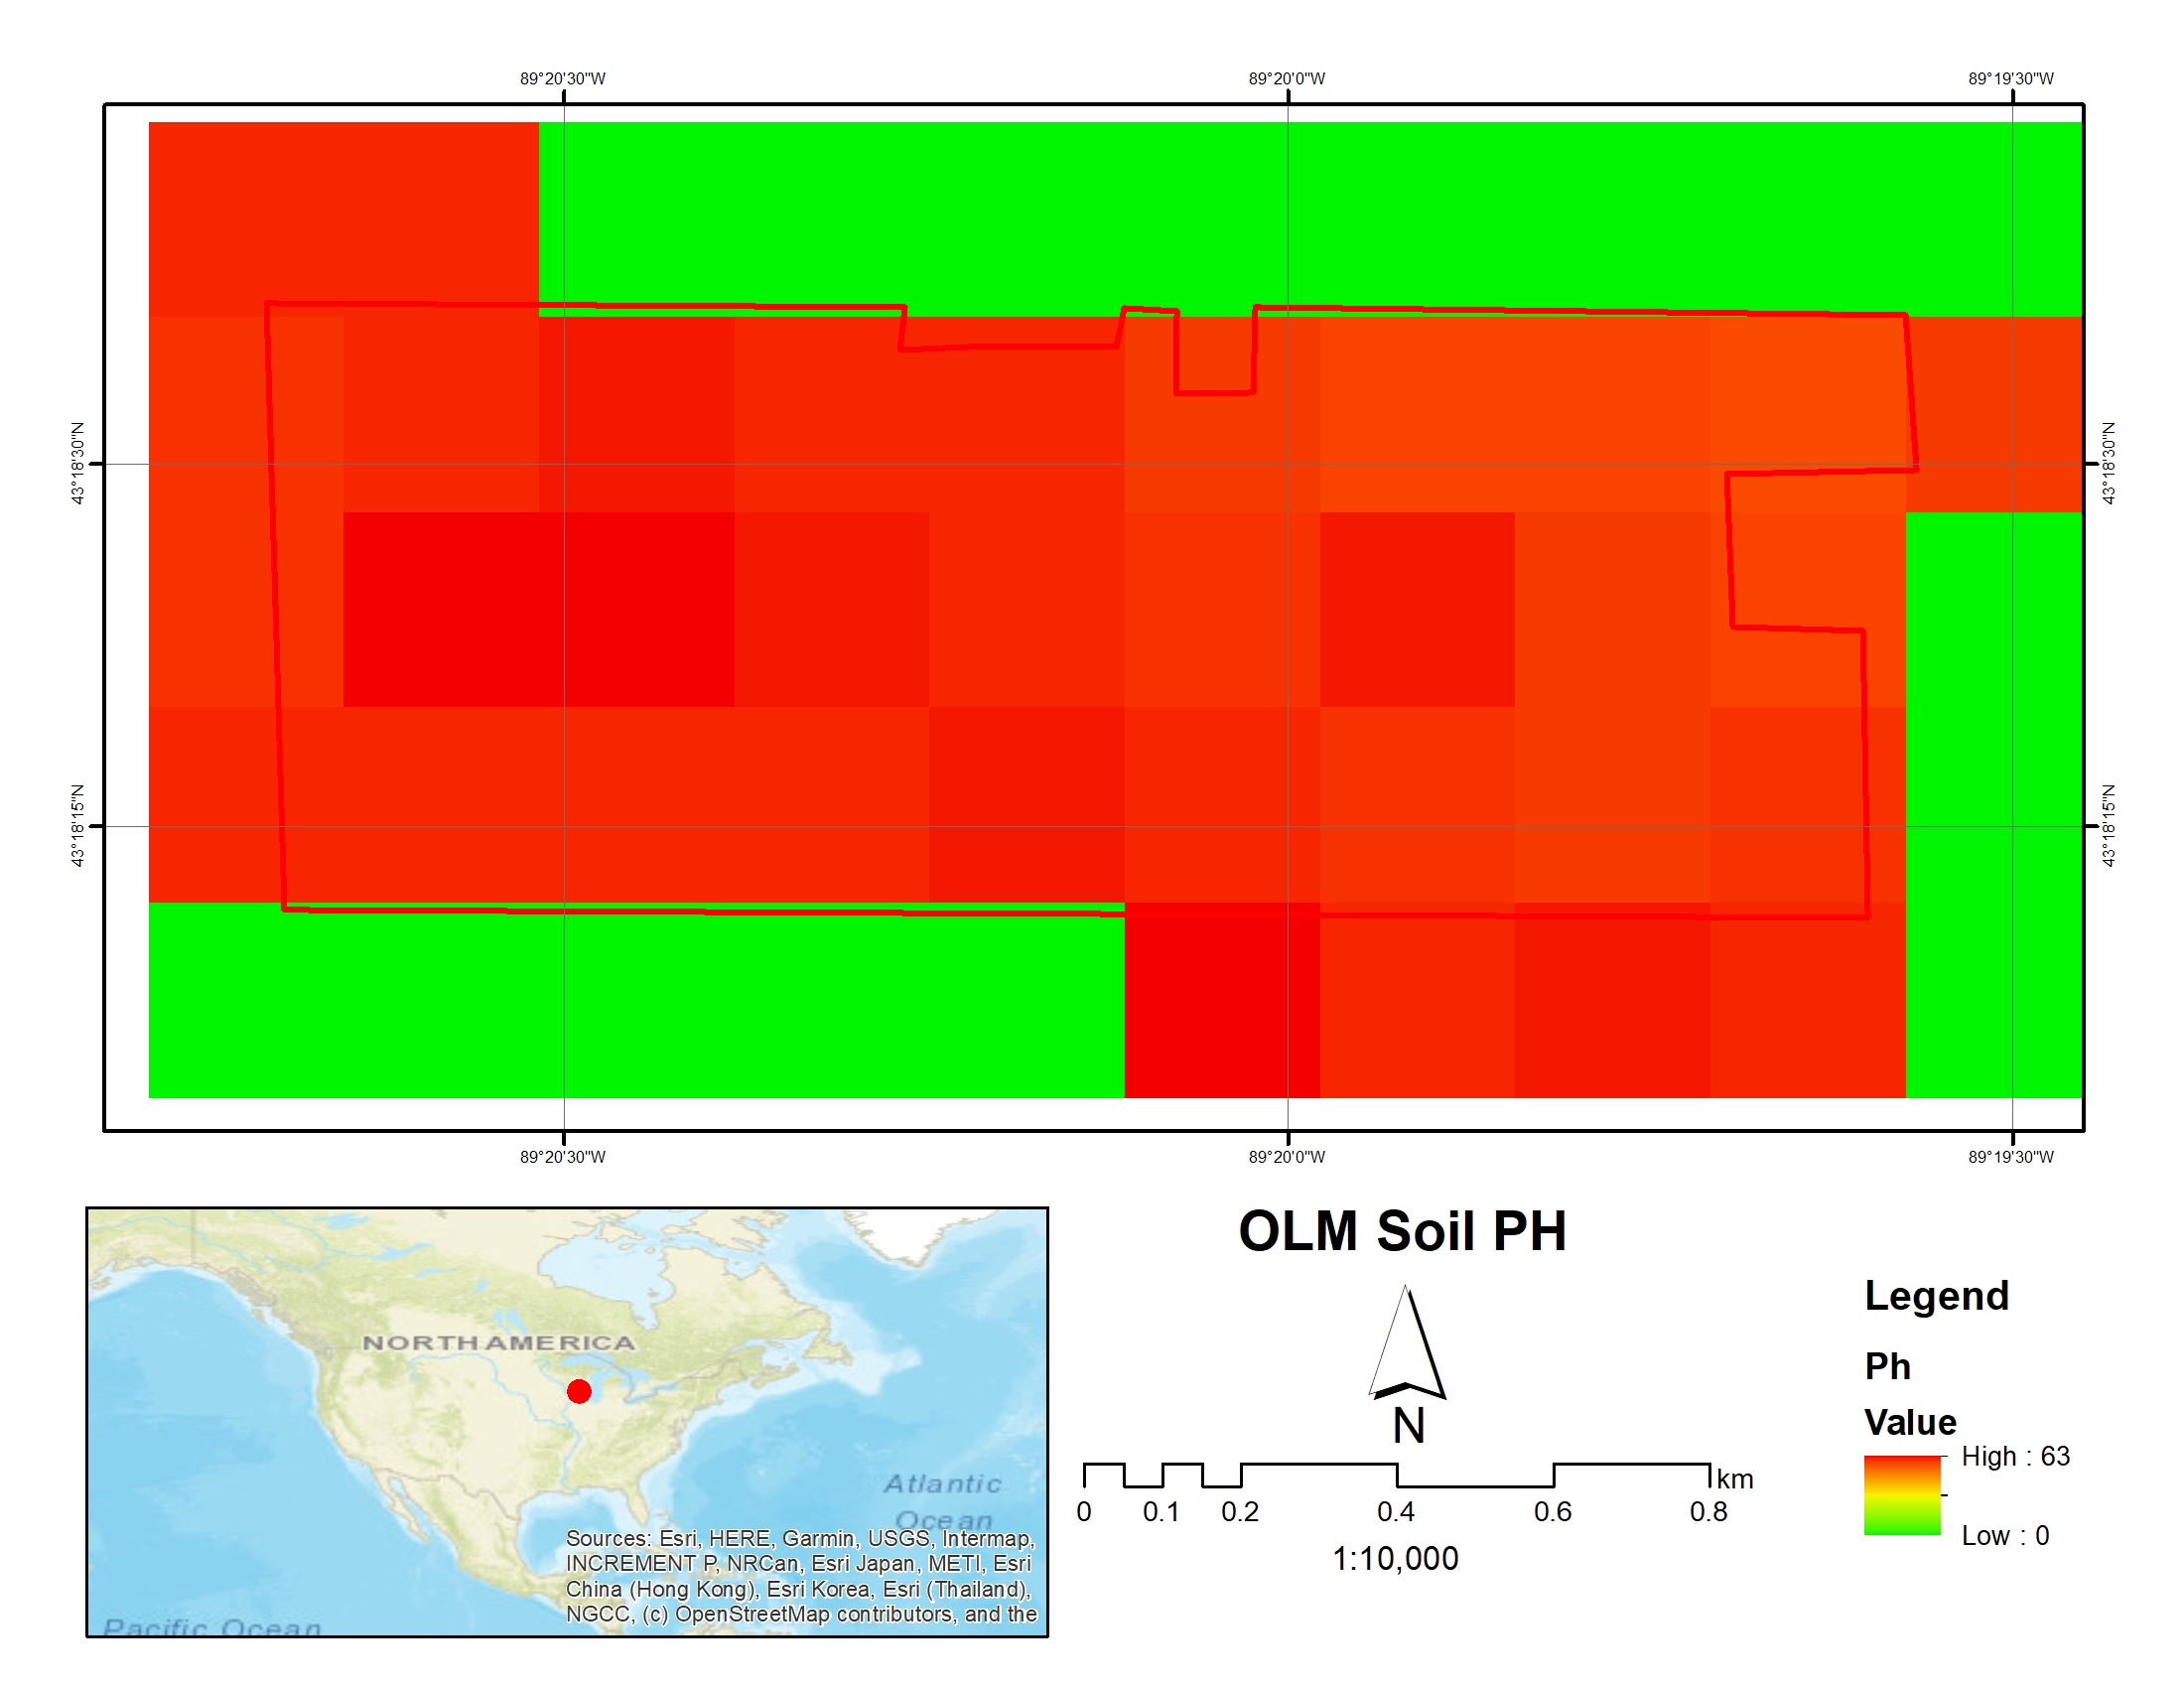


---



## **2. Exploratory Data Analysis**

2.1 Spatial distribution of sample
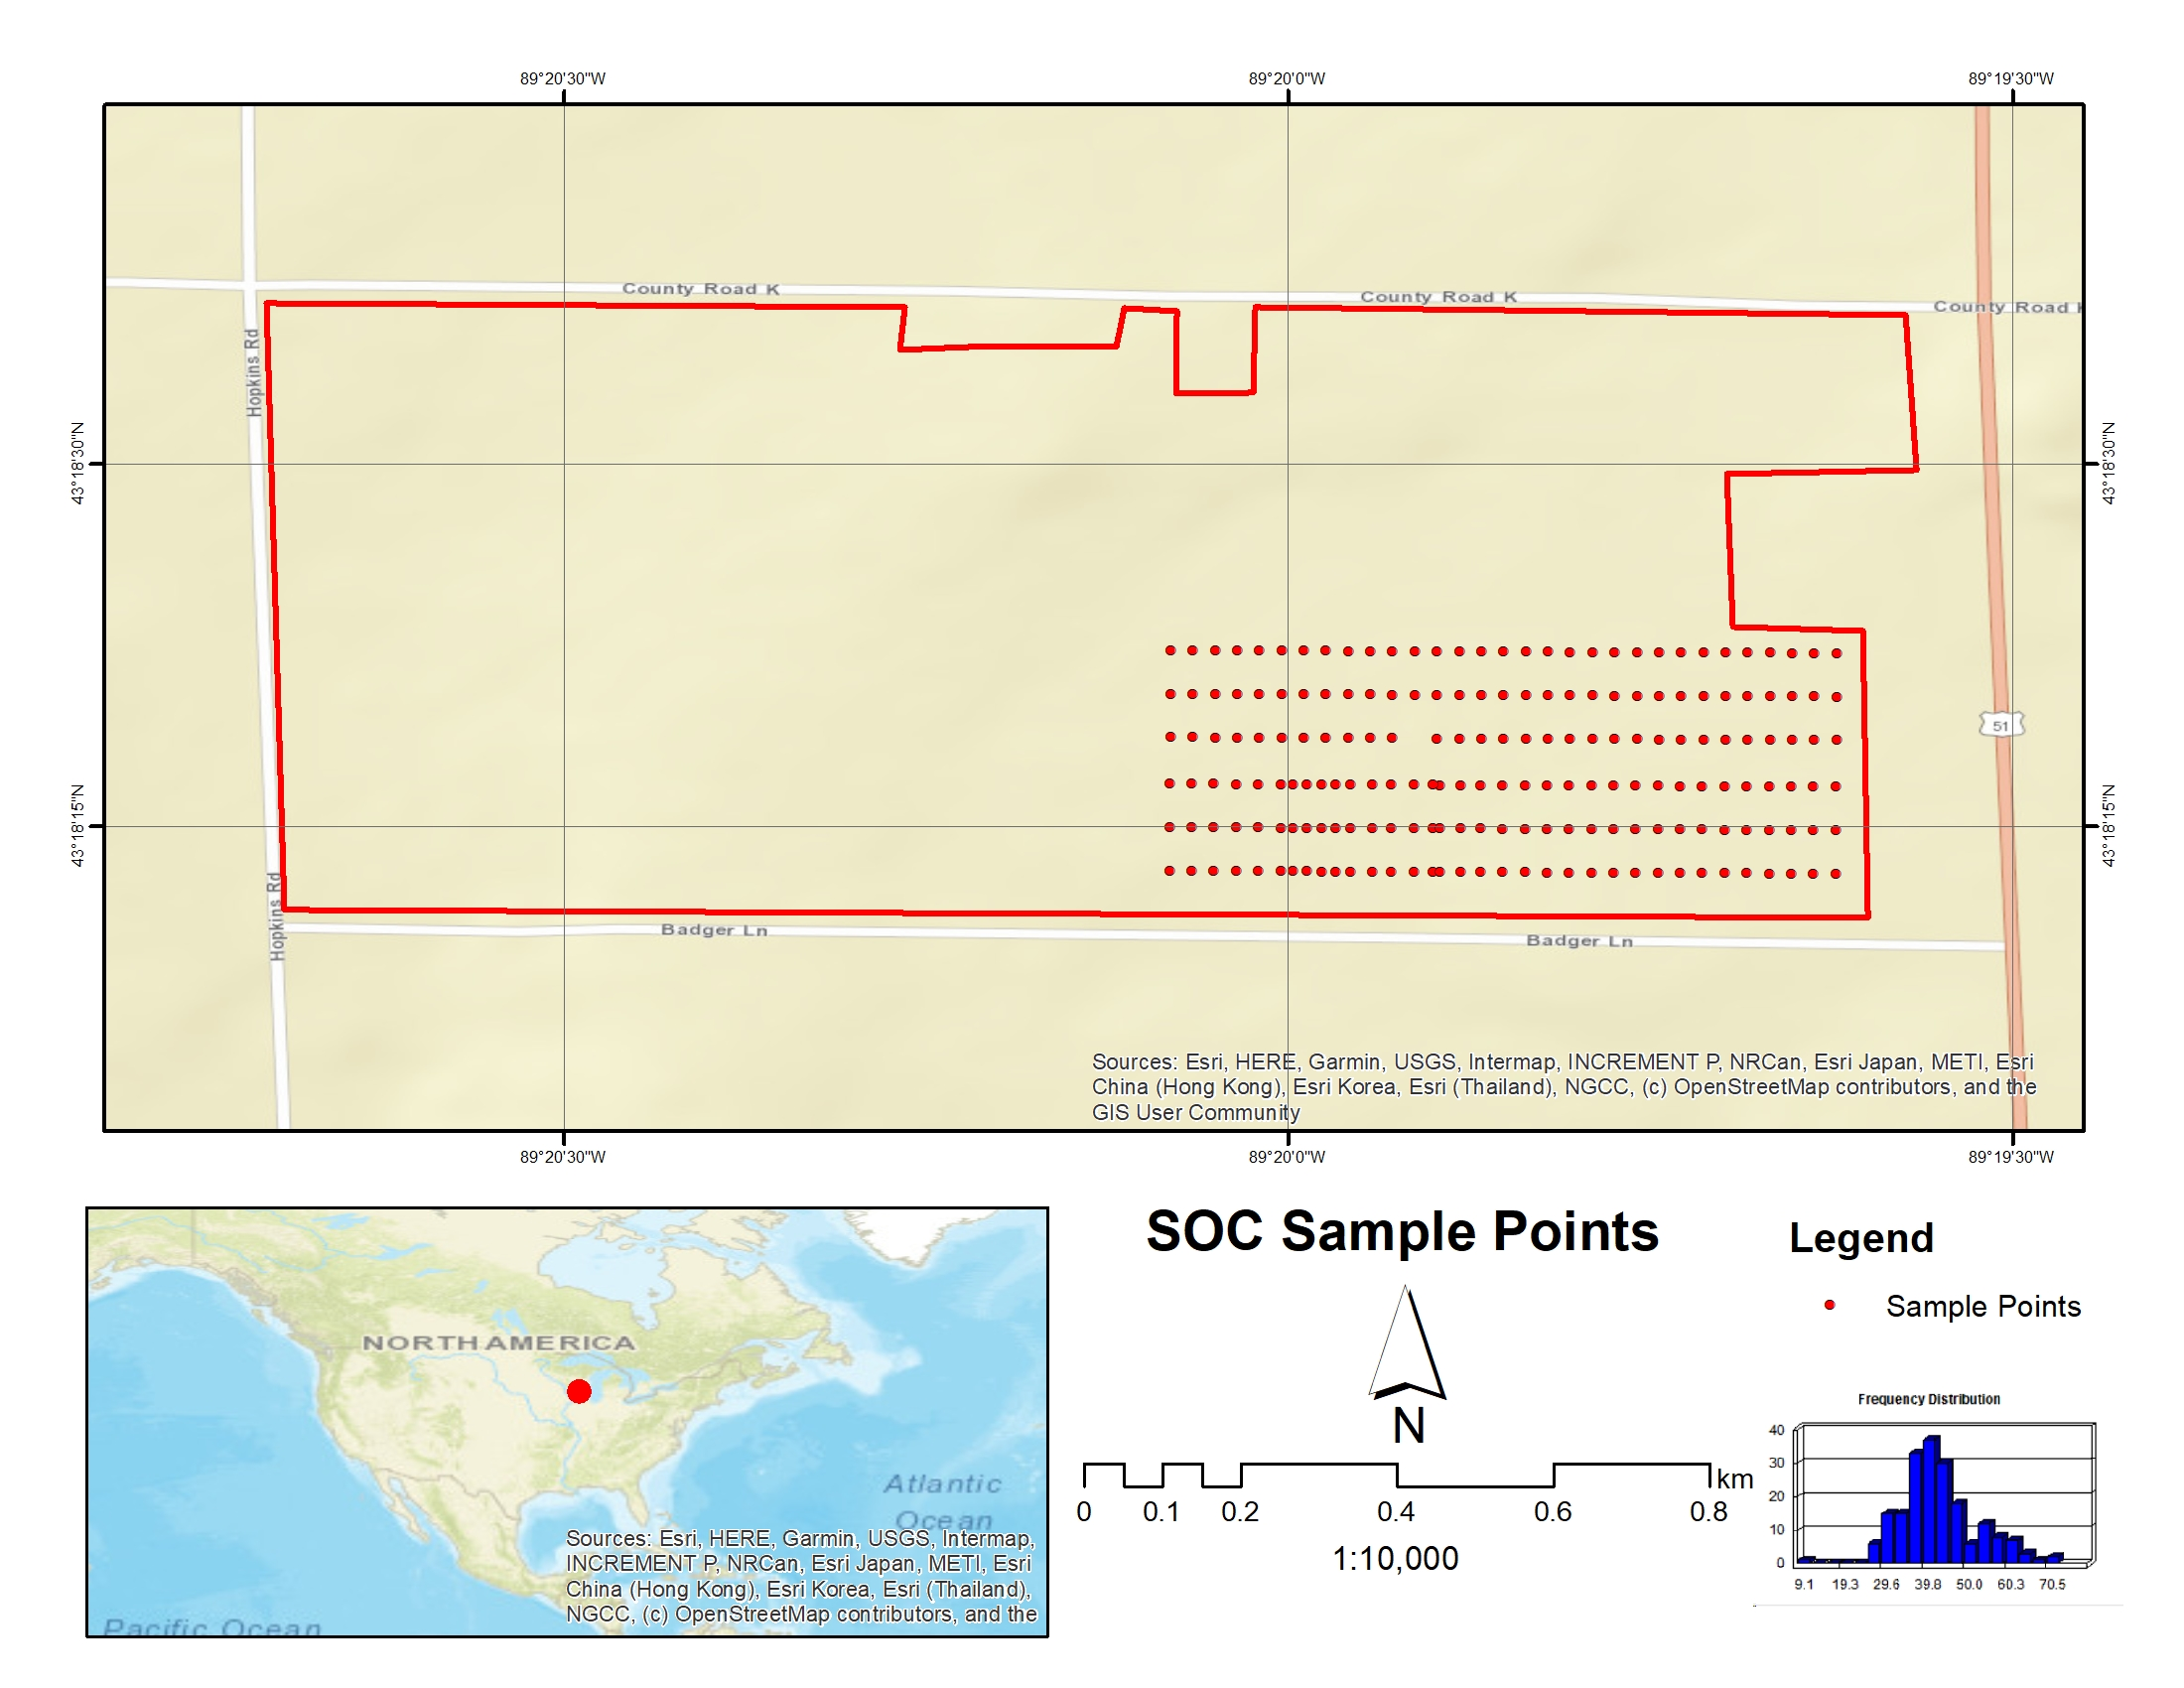


---



2.2 Basic Statistics


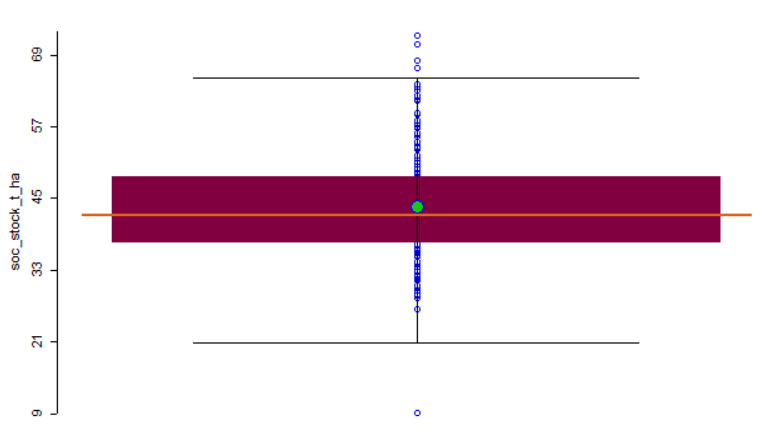

2.3 Histogram
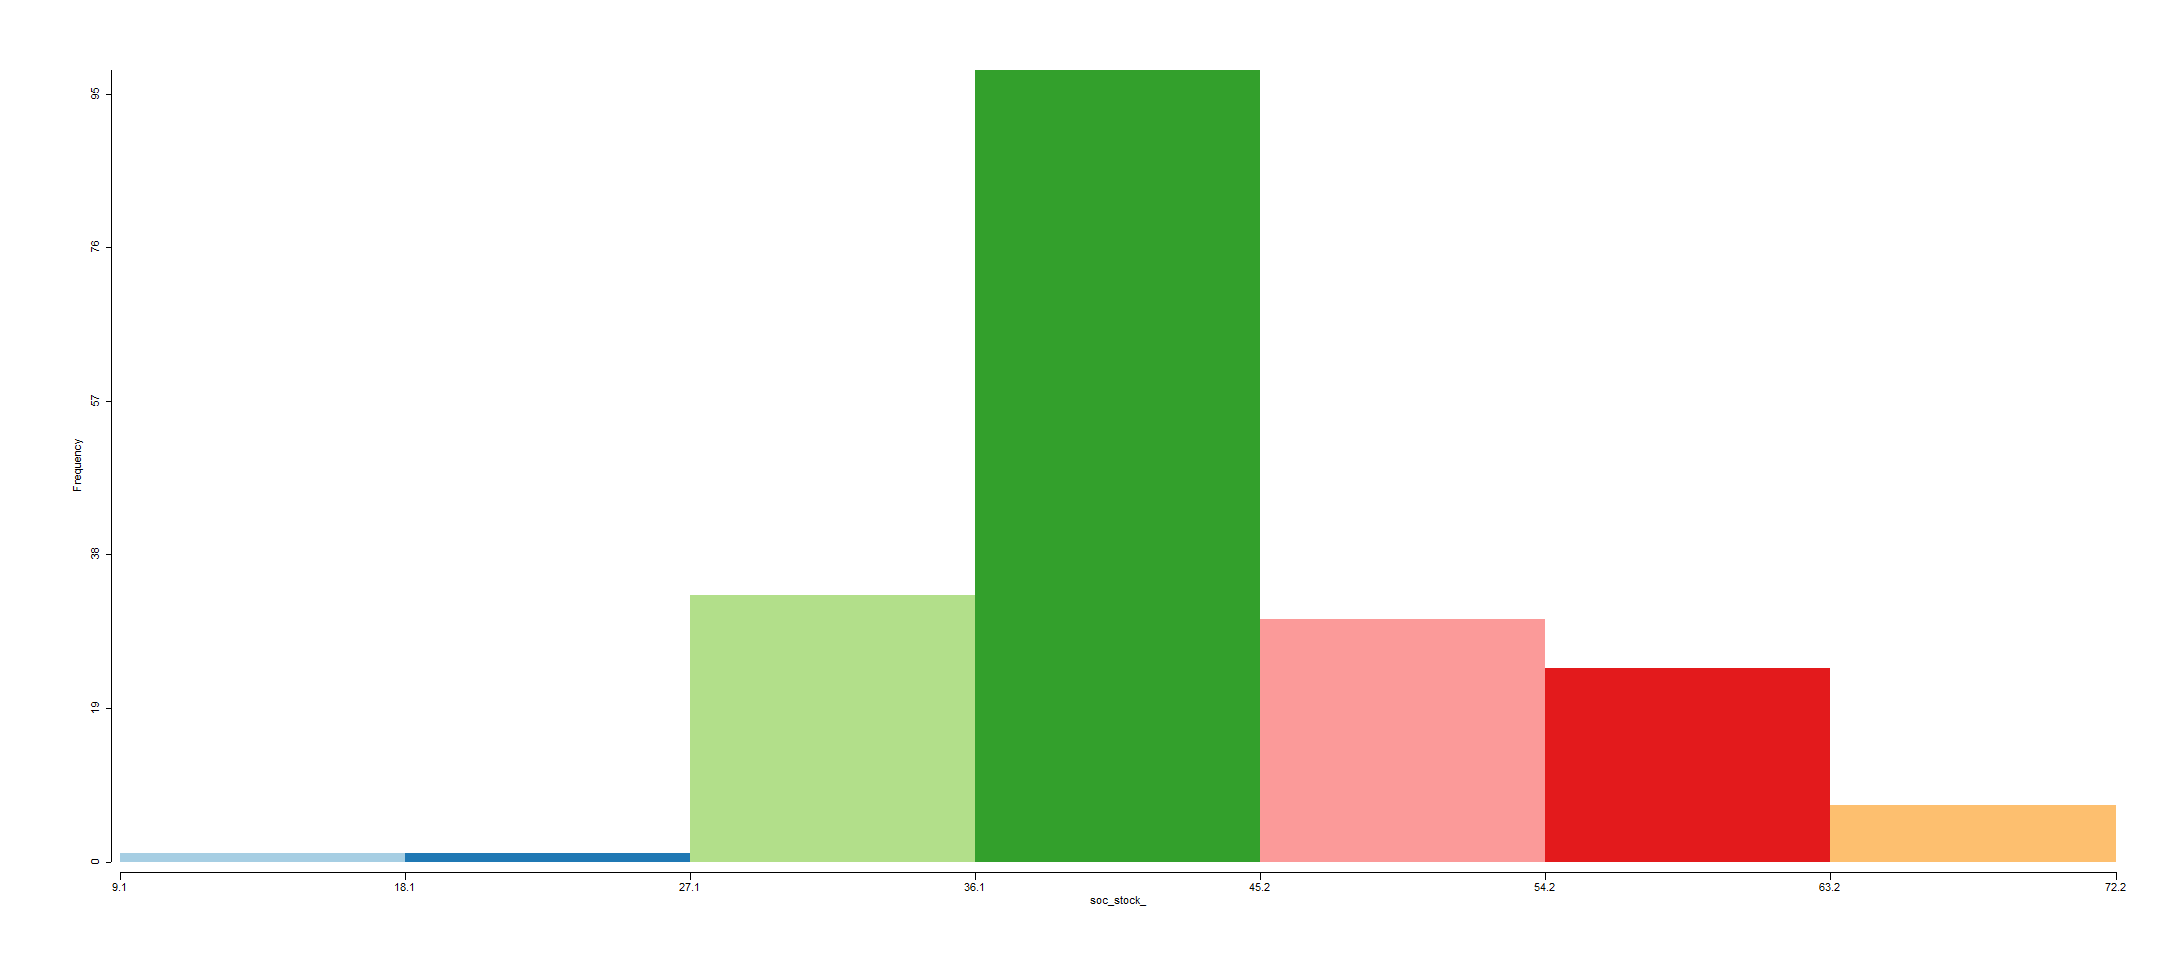

## **3. Identification of given covariates in GEE catalog**

3.1 Installation of Google Earth Engine

In [ ]:
%pip install geemap

In [ ]:
import ee
import geemap

In [ ]:
geemap.ee_initialize()

3.2 Locating and Mapping the covariates

In [ ]:
Map = geemap.Map()

In [ ]:
# Load the LANDSAT/LE07/C01/T1_ANNUAL_NDVI image collection
ndvi_collection_2009 = ee.ImageCollection('LANDSAT/LE07/C01/T1_ANNUAL_NDVI').filterDate('2009-01-01', '2009-12-31')

# Load the LANDSAT/LE07/C01/T1_ANNUAL_NDVI image collection
dem = ee.Image('CGIAR/SRTM90_V4')
slope = ee.Terrain.slope(dem)


#Load the MODIS NPP dataset (MOD17A3H V006).
modisCollection = ee.ImageCollection('MODIS/006/MOD17A3H').filterDate('2009-01-01', '2009-12-31')

# Select the NPP band (GPP - Gross Primary Productivity).
nppBand = modisCollection.select('Npp')

#Load the OLM soil dataset (SOL_PH-H2O_USDA-4C1A2A_M/v02).
soilclay = ee.Image('OpenLandMap/SOL/SOL_PH-H2O_USDA-4C1A2A_M/v02');

# Select the clay band (GPP - Gross Primary Productivity).
clay = soilclay.select('b0')

#Load the OLM soil dataset (SOL_PH-H2O_USDA-4C1A2A_M/v02).
soilph = ee.Image('OpenLandMap/SOL/SOL_PH-H2O_USDA-4C1A2A_M/v02');

# Select the clay band (GPP - Gross Primary Productivity).
ph = soilph.select('b0')

# Visualization parameters for NDVI
ndviViz = {'min': 0.5, 'max': 1, 'palette':  [
    'ffffff', 'ce7e45', 'df923d', 'f1b555', 'fcd163', '99b718', '74a901',
    '66a000', '529400', '3e8601', '207401', '056201', '004c00', '023b01',
    '012e01', '011d01', '011301'
  ]}

# Visualization parameters for Npp
nppViz = {'min': 0, 'max': 19000, 'palette':  ['bbe029', '0a9501', '074b03']}

# Visualization parameters for soilclay
clayViz = {'min': 2, 'max': 100, 'palette':  [
    'ffff00', 'f8f806', 'f1f10c', 'ebeb13', 'e4e419', 'dddd20',
    'd7d726', 'd0d02d', 'caca33', 'c3c33a', 'bcbc41', 'b6b647',
    'b0b04e', 'a9a954', 'a3a35a', '9c9c61', '959568', '8f8f6e',
    '898975', '82827b', '7b7b82', '757589', '6e6e8f', '686895',
    '61619c', '5a5aa3', '5454a9', '4d4db0', '4747b6', '4141bc',
    '3a3ac3', '3333ca', '2d2dd0', '2626d7', '2020dd', '1919e4',
    '1212eb', '0c0cf1', '0606f8', '0000ff',
  ]}
  # Visualization parameters for soilpH
phViz = {'min': 42, 'max': 110, 'palette':  [
    'ff0000', 'ff1c00', 'ff3900', 'ff5500', 'ff7100', 'ff8e00',
    'ffaa00', 'ffc600', 'ffe200', 'ffff00', 'e3ff00', 'c7ff00',
    'aaff00', '8eff00', '72ff00', '55ff00', '39ff00', '1dff00',
    '01ff00', '00ff1c', '00ff38', '00ff54', '00ff71', '00ff8d',
    '00ffa9', '00ffc6', '00ffe2', '00fffe', '00e3ff', '00c7ff',
    '00abff', '008fff', '0072ff', '0056ff', '003aff', '001dff',
    '0001ff', '1b00ff', '3800ff', '5400ff',
  ]}
Map.addLayer(ndvi_collection_2009, ndviViz, 'Annual NDVI 2009')
Map.addLayer(slope,{'min': 0, 'max': 60}, 'Slope')
Map.addLayer(nppBand, nppViz, 'MODIS Annual NPP 2009')
Map.addLayer(clay, clayViz, 'OLM Annual Soil Clay Content')
Map.addLayer(ph, phViz, 'OLM Soil Ph in H2O Content')
# Center the map and display the image.
Map.setCenter(-89.3, 43.3, 7)
Map.addLayerControl()
Map


3.3 Summary of covariates



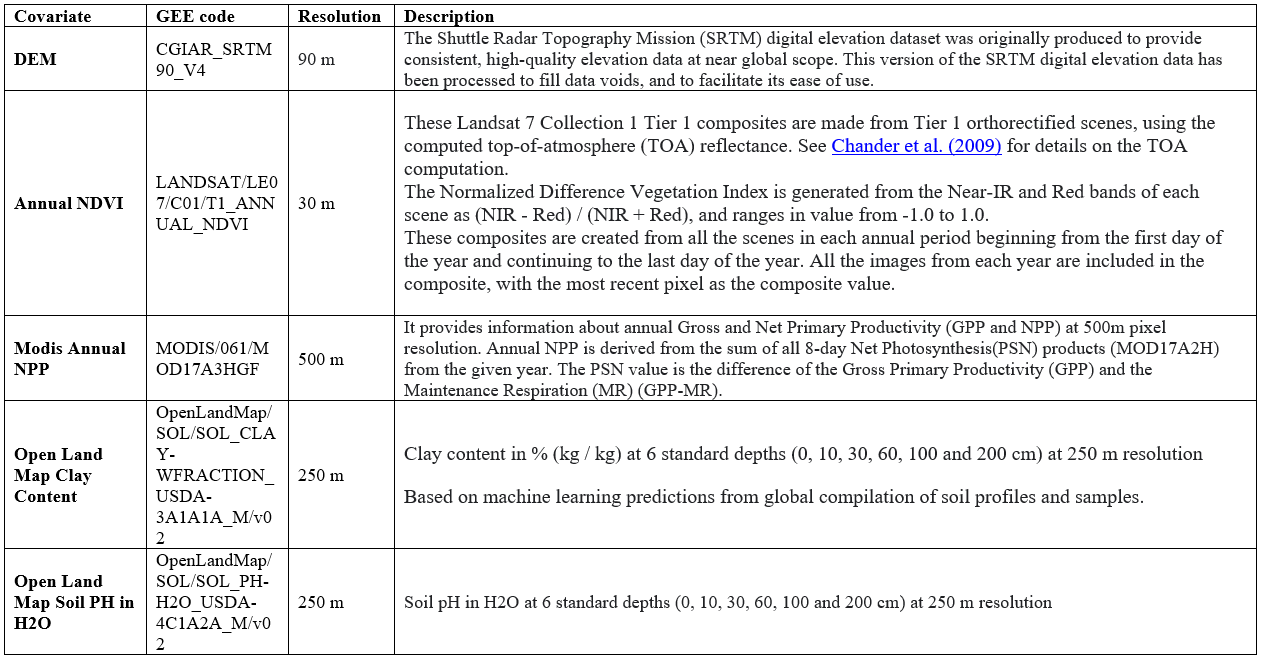

## **4. Relationships with and among the covariates**

4.1 Extracting covariate values at sampling points

```

from qgis.core import QgsProcessing
from qgis.core import QgsProcessingAlgorithm
from qgis.core import QgsProcessingMultiStepFeedback
from qgis.core import QgsProcessingParameterFeatureSink
import processing


class Model(QgsProcessingAlgorithm):

    def initAlgorithm(self, config=None):
        self.addParameter(QgsProcessingParameterFeatureSink('Extracted', 'Extracted', type=QgsProcessing.TypeVectorPoint, createByDefault=True, defaultValue=None))

    def processAlgorithm(self, parameters, context, model_feedback):
        # Use a multi-step feedback, so that individual child algorithm progress reports are adjusted for the
        # overall progress through the model
        feedback = QgsProcessingMultiStepFeedback(5, model_feedback)
        results = {}
        outputs = {}

        # NDVI_Extracted
        alg_params = {
            'COLUMN_PREFIX': 'NDVI',
            'INPUT': 'D:/GEOTECH/Sequana/sample.shp',
            'RASTERCOPY': 'D:/GEOTECH/Sequana/seqana_gis_solutions_engineering_working_student_challenge_data/covariates/landsat7_c01_t1_annual_ndvi_2009.tif',
            'OUTPUT': QgsProcessing.TEMPORARY_OUTPUT
        }
        outputs['Ndvi_extracted'] = processing.run('native:rastersampling', alg_params, context=context, feedback=feedback, is_child_algorithm=True)

        feedback.setCurrentStep(1)
        if feedback.isCanceled():
            return {}

        # DEM_extracted
        alg_params = {
            'COLUMN_PREFIX': 'DEM',
            'INPUT': outputs['Ndvi_extracted']['OUTPUT'],
            'RASTERCOPY': 'D:/GEOTECH/Sequana/seqana_gis_solutions_engineering_working_student_challenge_data/covariates/CGIAR_SRTM90_V4.tif',
            'OUTPUT': QgsProcessing.TEMPORARY_OUTPUT
        }
        outputs['Dem_extracted'] = processing.run('native:rastersampling', alg_params, context=context, feedback=feedback, is_child_algorithm=True)

        feedback.setCurrentStep(2)
        if feedback.isCanceled():
            return {}

        # NPP_Extracted
        alg_params = {
            'COLUMN_PREFIX': 'NPP',
            'INPUT': outputs['Dem_extracted']['OUTPUT'],
            'RASTERCOPY': 'D:/GEOTECH/Sequana/seqana_gis_solutions_engineering_working_student_challenge_data/covariates/modis_annual_npp_2009.tif',
            'OUTPUT': QgsProcessing.TEMPORARY_OUTPUT
        }
        outputs['Npp_extracted'] = processing.run('native:rastersampling', alg_params, context=context, feedback=feedback, is_child_algorithm=True)

        feedback.setCurrentStep(3)
        if feedback.isCanceled():
            return {}

        # Soil_Clay_Extracted
        alg_params = {
            'COLUMN_PREFIX': 'Clay',
            'INPUT': outputs['Npp_extracted']['OUTPUT'],
            'RASTERCOPY': 'D:/GEOTECH/Sequana/seqana_gis_solutions_engineering_working_student_challenge_data/covariates/open_land_map_soil_clay.tif',
            'OUTPUT': QgsProcessing.TEMPORARY_OUTPUT
        }
        outputs['Soil_clay_extracted'] = processing.run('native:rastersampling', alg_params, context=context, feedback=feedback, is_child_algorithm=True)

        feedback.setCurrentStep(4)
        if feedback.isCanceled():
            return {}

        # Ph_extracted
        alg_params = {
            'COLUMN_PREFIX': 'Ph',
            'INPUT': outputs['Soil_clay_extracted']['OUTPUT'],
            'RASTERCOPY': 'D:/GEOTECH/Sequana/seqana_gis_solutions_engineering_working_student_challenge_data/covariates/open_land_map_soil_ph.tif',
            'OUTPUT': parameters['Extracted']
        }
        outputs['Ph_extracted'] = processing.run('native:rastersampling', alg_params, context=context, feedback=feedback, is_child_algorithm=True)
        results['Extracted'] = outputs['Ph_extracted']['OUTPUT']
        return results

    def name(self):
        return 'model'

    def displayName(self):
        return 'model'

    def group(self):
        return ''

    def groupId(self):
        return ''

    def createInstance(self):
        return Model()

```


---


Model diiagram

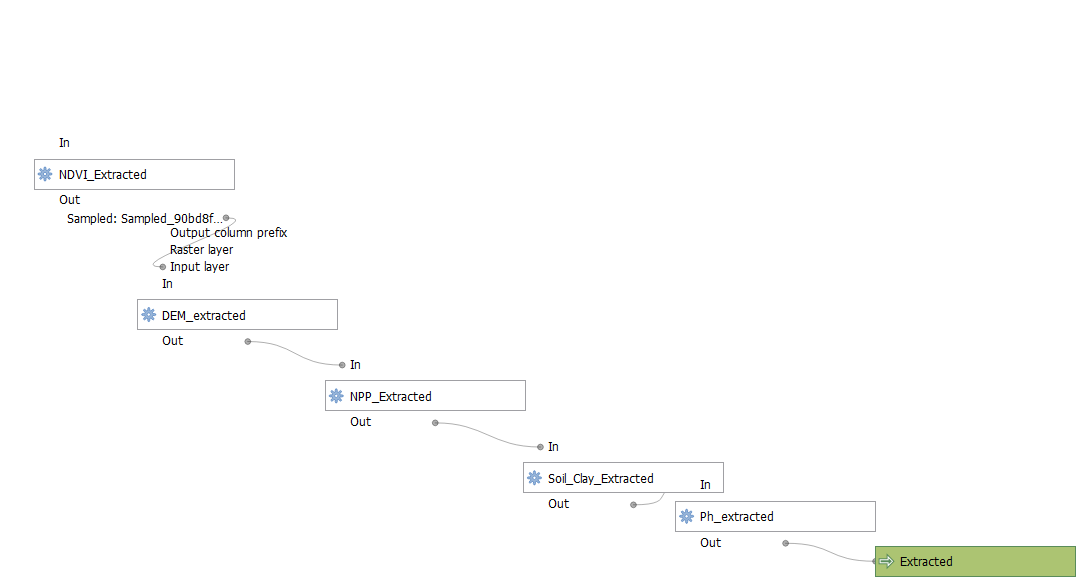


---




4.2 Correlation Analysis

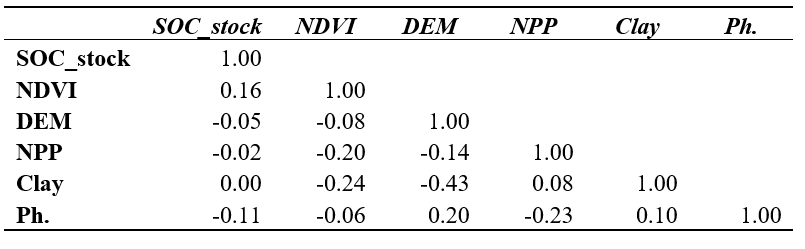

4.3 Relevence of each covariates
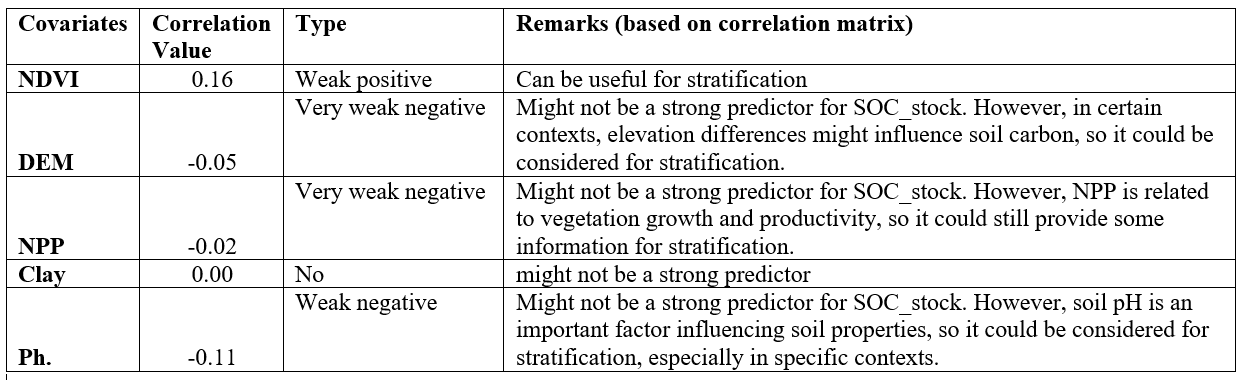

In my openion, this correlation of SOC with other covariates are not enough to model/predict SOC for entire project area.

So, either the resolution of the covariates(except NDVI) needs to be reduced or sampling distance should be increased



## **5. Modeling and Stratified Random Sampling**

5.1 SOC Modeling

If we get the good correlation among the covariates and SOC, we can model the SOC for whole project area. It can be done with

*   Regression analysis followed by the raster analysis in GIS.
*   Machine Learning where we can train the model and predict the Soc for project area.


**Regression Analysis**

For the Regression, first of all regression neeeds to be performed between independent and dependent variables. for eg: Regression between SOC with NDVI and PH


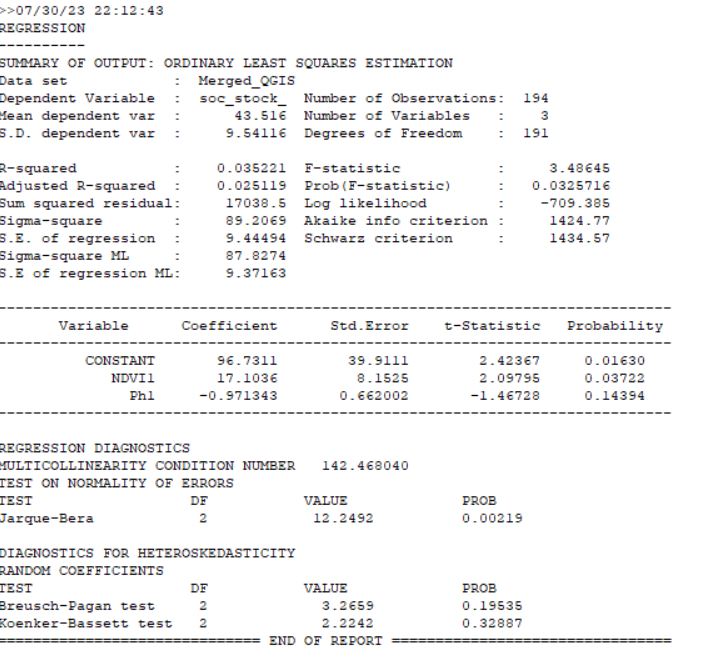

Now using the regression equation, following python code can be implemented to get the startified random sample for the whole project area.

*   Raster Calculator
*   Reclassify Raster
*   Create Accuracy Assessment Points

```

# Import arcpy module
import arcpy


# Local variables:
Annual_NDVI = "Annual NDVI"
Ph = "Ph"
predicted_Soc = "D:\\GEOTECH\\Sequana\\predicted_Soc"
SOC_pdt_recla = "D:\\GEOTECH\\Sequana\\SOC_pdt_recla"
Stratified_rdm_shp = "D:\\GEOTECH\\Sequana\\Stratified_rdm.shp"

# Process: Raster Calculator
arcpy.gp.RasterCalculator_sa("96.73 + 17.10*\"%Annual NDVI%\"-0.97*\"%Ph%\"", predicted_Soc)

# Process: Reclassify
arcpy.Reclassify_3d(predicted_Soc, "", "", SOC_pdt_recla, "DATA")

# Process: Create Accuracy Assessment Points
arcpy.gp.CreateAccuracyAssessmentPoints_sa(SOC_pdt_recla, Stratified_rdm_shp, "CLASSIFIED", "500", "STRATIFIED_RANDOM")

```



**Machine Learning**

For this method we can perform as follows


*   Divide the samples joined with extracted values of covariates in training and validation samples(70-30)

*   Training the model (random forest)


```
library(xlsx)
library(raster)
library(randomForest)
setwd("D:/GEOTECH/Sequana/")
dt <- read.xlsx("training_dataset.xlsx",sheetName = "training_set")
dt_test <- read.xlsx("training_dataset.xlsx",sheetName = "testing_set")

##randomForest Modelling
new_rf<-data.frame(dt$Elevation)
rf_model<- randomForest(dt$Observed_wt ~ dt$Elevation,  ntreeTry=500,
                        mtryStart=4,
                        stepFactor=1.5,
                        improve=0.01,
                        trace=FALSE, data=dt)
Pr_valuerF <- predict(rf_model,newdata=dt_test)
Pr_valuerF
cor(Pr_valuerF,dt$Elevation)

##SOC prediction
covariates <- stack("D:/GEOTECH/Sequana/covariates/NDVI.tif","D:/GEOTECH/Sequana/covariates/Ph.tif")
pr_Soc <- predict(rf_model, newdata = covariates)

```





Then again

*   Reclassify Raster
*   Create Accuracy Assessment Points

is performed to create the stratified random samples for SOC.



**Sample Output**



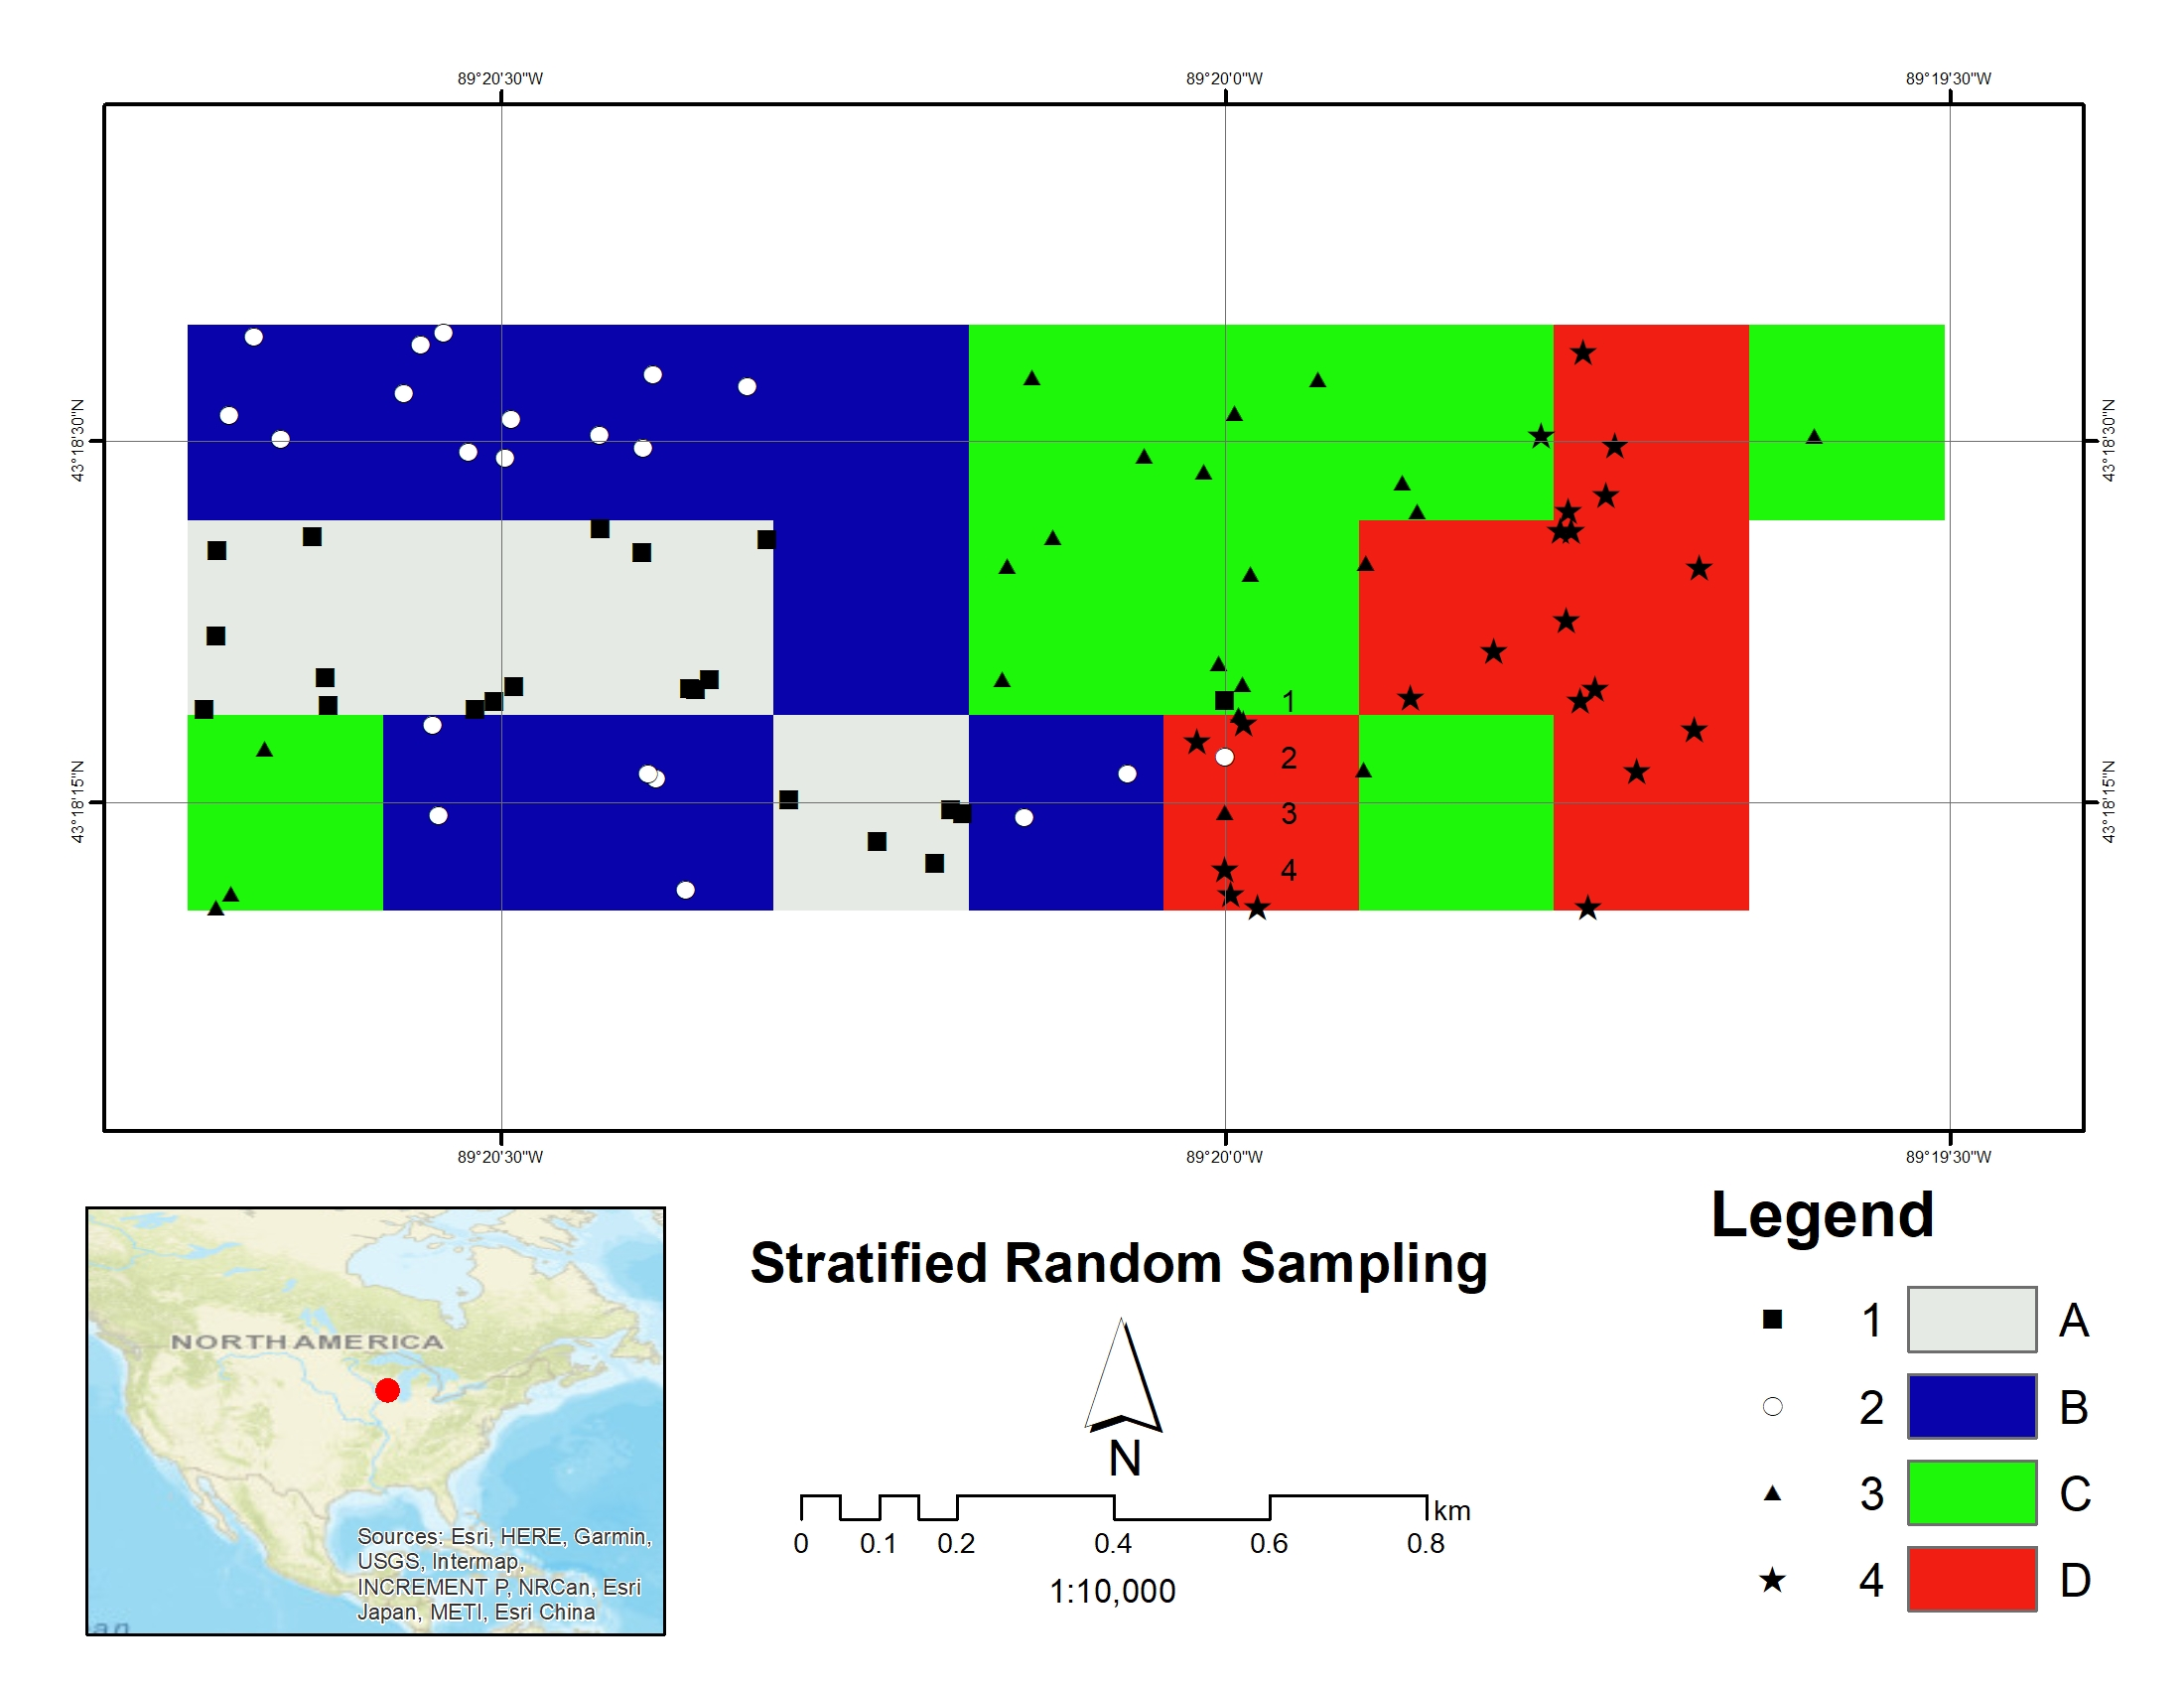



---

                                                                      THANK YOU

---

